### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## recreate data

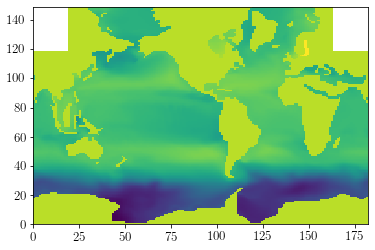

In [7]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_GEA7/ORCA2_1m_19410101_19411231_ptrc_T.nc')

plt.pcolormesh(w['B14B'][0,0,:,:])

In [4]:
yrst = 1940; yrend = 2023
extract = True
if extract:
    def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs/'):
        yrs = np.arange(yrst,yrend+1,1)
        ylist = []
        for i in range(0,len(yrs)):
            ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
            t2 = glob.glob(ty)
            #print(t2)
            ylist.append(t2[0])
        return ylist



    GEA4_diad = xr.open_mfdataset(make_yearlist(yrst,yrend,'diad_T','TOM12_TJ_R4A1'))
    GEC4_diad = xr.open_mfdataset(make_yearlist(yrst,yrend,'diad_T','TOM12_TJ_R4C1'))

    GEA4_diad.qtrB14b.to_netcdf(f'./GCBdata/R4A1_{yrst}_{yrend}_qtrB14b.nc')
    GEC4_diad.qtrB14b.to_netcdf(f'./GCBdata/R4C1_{yrst}_{yrend}_qtrB14b.nc')
    GEA4_diad.Cflx.to_netcdf(f'./GCBdata/R4A1_{yrst}_{yrend}_Cflx.nc')
    GEC4_diad.Cflx.to_netcdf(f'./GCBdata/R4C1_{yrst}_{yrend}_Cflx.nc')

KeyboardInterrupt: 

In [ ]:
tmeshf = '/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc'
tmesh = xr.open_dataset(tmeshf)
C14d_qtr_c14 = xr.open_dataset(f'./GCBdata/R4A1_{yrst}_{yrend}_qtrB14b.nc')   ##static
C14d_Cflx = xr.open_dataset(f'./GCBdata/R4A1_{yrst}_{yrend}_Cflx.nc') ###static

C14c_qtr_c14 = xr.open_dataset(f'./GCBdata/R4C1_{yrst}_{yrend}_qtrB14b.nc')
C14c_Cflx = xr.open_dataset(f'./GCBdata/R4C1_{yrst}_{yrend}_Cflx.nc')

times = pd.date_ranR4(f'{yrst}/01/01',f'{yrend}/12/31',freq='MS')


In [ ]:
GEA4_diad

In [ ]:
# compilerKey:/gpfs/home/avd22gnu/scratch/modelTest/RIV12/CONFIG/ORCA2_LIM_PlankTOM/cpp_ORCA2_LIM_PlankTOM.fcm

# /gpfs/home/avd22gnu/scratch/modelTest/RIV12/CONFIG/ORCA2_LIM_PlankTOM/cpp_ORCA2_LIM_PlankTOM.fcm

w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4A1/ORCA2_1m_19400101_19401231_ptrc_T.nc')
w

In [ ]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_GEA5/ORCA2_1m_19700101_19701231_diad_T.nc')
w

In [ ]:
w = xr.open_dataset('/gpfs/data/greenocean/software/runs/TOM12_TJ_R4A0/ORCA2_1m_19700101_19701231_diad_T.nc')
w